## Analysis

1. There are far more drivers, as well as rides, in urban cities. Average fairs are also lower in urban citites. This could be due to the higher number of rides or greater avialability of drivers, based on the information provided. Another data point that may have provided more insight as to why the rides in urban cities have lower average fares would be the distance of each ride.  
2. Rides in rural cities have a significanlty higher average price in comparison to other city types. This could be due to driver availability as well as number of rides taken in those cities. It is also possible that rides in rural areas have a higher average distance than that of rides taken in urban and suburban areas.

3. Offering discounted rides in rural cities, and possibly even suburban cities, could increase usage. Promotion of the service in these areas could also increase usage. 

In [10]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
city_csv = 'Resources/city_data.csv'
ride_csv = 'Resources/ride_data.csv'

city_data = pd.read_csv(city_csv)
ride_data = pd.read_csv(ride_csv)

ride_data.head()
#city_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [12]:
merged = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

merged.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [13]:
urban = merged[merged["type"] == "Urban"]
suburban = merged[merged["type"] == "Suburban"]
rural = merged[merged["type"] == "Rural"]

urban_rides = urban.groupby(["city"]).count()["ride_id"]
suburban_rides = suburban.groupby(["city"]).count()["ride_id"]
rural_rides = rural.groupby(["city"]).count()["ride_id"]

urban_fares = urban.groupby(["city"]).mean()["fare"]
suburban_fares = suburban.groupby(["city"]).mean()["fare"]
rural_fares = rural.groupby(["city"]).mean()["fare"]

urban_drivers = urban.groupby(["city"]).count()["driver_count"]
suburban_drivers = suburban.groupby(["city"]).count()["driver_count"]
rural_drivers = rural.groupby(["city"]).count()["driver_count"]

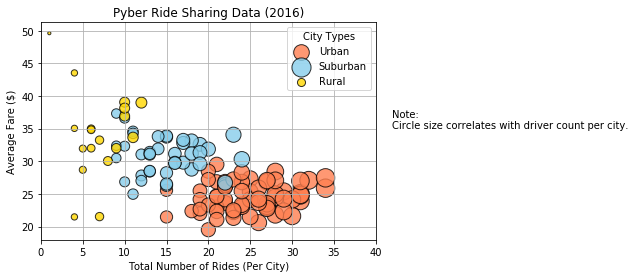

In [14]:
plt.scatter(urban_rides, 
            urban_fares, 
            s=10*urban_drivers, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_rides, 
            suburban_fares, 
            s=10*suburban_drivers, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_rides, 
            rural_fares, 
            s=10*rural_drivers, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

legend = plt.legend(loc="best", title="City Types")

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)

plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.show()

In [15]:
urban_fares = len(merged[merged["type"] == "Urban"])
percent_urban_fares = round((urban_fares/len(merged["type"])*100),2)

suburban_fares = len(merged[merged["type"] == "Suburban"])
percent_suburban_fares = round((suburban_fares/len(merged["type"])*100),2)

rural_fares = len(merged[merged["type"] == "Rural"])
percent_rural_fares = round((rural_fares/len(merged["type"])*100),2)

fares_by_type = [percent_urban_fares, percent_suburban_fares, percent_rural_fares]
labels = ["Urban","Suburban", "Rural"]

fares_by_type

[67.51, 27.3, 5.19]

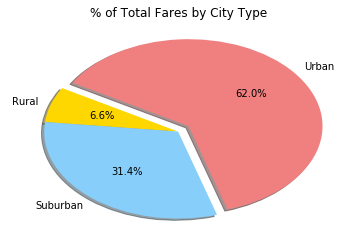

In [16]:
fares = 100 * merged.groupby(["type"]).sum()["fare"] / merged["fare"].sum()

plt.pie(fares, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

plt.show()

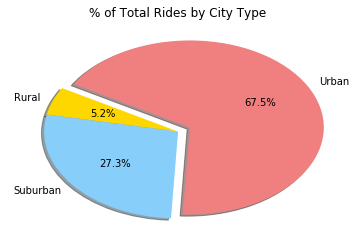

In [17]:
rides = 100 * merged.groupby(["type"]).count()["ride_id"] / merged["ride_id"].count()

plt.pie(rides, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

plt.show()

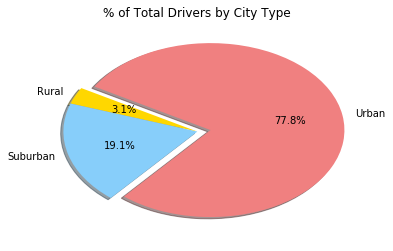

In [19]:
drivers = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

#drivers = 100 * merged.groupby(["type"]).sum()["driver_count"] / merged["driver_count"].sum()

plt.pie(drivers, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

plt.show()